<a href="https://colab.research.google.com/github/sweetyjunnarkar/Recommend_Book/blob/main/Sweety_Junnarkar_Capstone_Project_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.]

**Content**

The Book-Crossing dataset comprises 3 files.

● **Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● **Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● **Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
users_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 6/Week 1/Book Recommendation System/data/Users.csv")

In [3]:
users_df.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
users_df['City'] = users_df['Location'].str.split(',').apply(lambda x: x[0])
users_df['Country'] = users_df['Location'].str.split(',').apply(lambda x: x[-1])

In [5]:
users_df

,User-ID,Location,Age,City,Country
0,1,"nyc, new york, usa",NaN,nyc,usa
1,2,"stockton, california, usa",18.0,stockton,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,united kingdom
...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,united kingdom
278855,278856,"brampton, ontario, canada",NaN,brampton,canada
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,usa


In [6]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
 3   City      278858 non-null  object 
 4   Country   278858 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.6+ MB


In [7]:
users_df.isnull().sum()

User-ID          0
Location         0
Age         110762
City             0
Country          0
dtype: int64

In [8]:
users_df.describe(include="all")

,User-ID,Location,Age,City,Country
count,278858.00000,278858,168096.000000,278858,278858
unique,NaN,57339,NaN,32770,709
top,NaN,"london, england, united kingdom",NaN,london,usa
freq,NaN,2506,NaN,4105,139711
mean,139429.50000,NaN,34.751434,NaN,NaN
std,80499.51502,NaN,14.428097,NaN,NaN
min,1.00000,NaN,0.000000,NaN,NaN
25%,69715.25000,NaN,24.000000,NaN,NaN
50%,139429.50000,NaN,32.000000,NaN,NaN
75%,209143.75000,NaN,44.000000,NaN,NaN


In [9]:
books_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 6/Week 1/Book Recommendation System/data/Books.csv",low_memory=False)

In [10]:
books_df.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [11]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [12]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [13]:
books_df.loc[books_df.isnull().any(axis=1)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [14]:
books_df["Book-Author"].fillna("David Tait", inplace=True)

In [15]:
books_df['Book-Author'].loc[187689]

'David Tait'

In [16]:
books_df["Publisher"].fillna("Novelbooks Inc", inplace=True)

In [17]:
books_df.loc[128890]

ISBN                                                          193169656X
Book-Title                                                   Tyrant Moon
Book-Author                                              Elaine Corvidae
Year-Of-Publication                                                 2002
Publisher                                                 Novelbooks Inc
Image-URL-S            http://images.amazon.com/images/P/193169656X.0...
Image-URL-M            http://images.amazon.com/images/P/193169656X.0...
Image-URL-L            http://images.amazon.com/images/P/193169656X.0...
Name: 128890, dtype: object

In [18]:
books_df["Publisher"].loc[129037]="Bantam"

In [19]:
books_df.loc[129037]

ISBN                                                          1931696993
Book-Title                                               Finders Keepers
Book-Author                                              Linnea Sinclair
Year-Of-Publication                                                 2001
Publisher                                                         Bantam
Image-URL-S            http://images.amazon.com/images/P/1931696993.0...
Image-URL-M            http://images.amazon.com/images/P/1931696993.0...
Image-URL-L            http://images.amazon.com/images/P/1931696993.0...
Name: 129037, dtype: object

In [20]:
ratings_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 6/Week 1/Book Recommendation System/data/Ratings.csv")

In [21]:
ratings_df.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [22]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [23]:
ratings_df.describe(include='all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


In [24]:
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

<Figure size 1080x576 with 0 Axes>

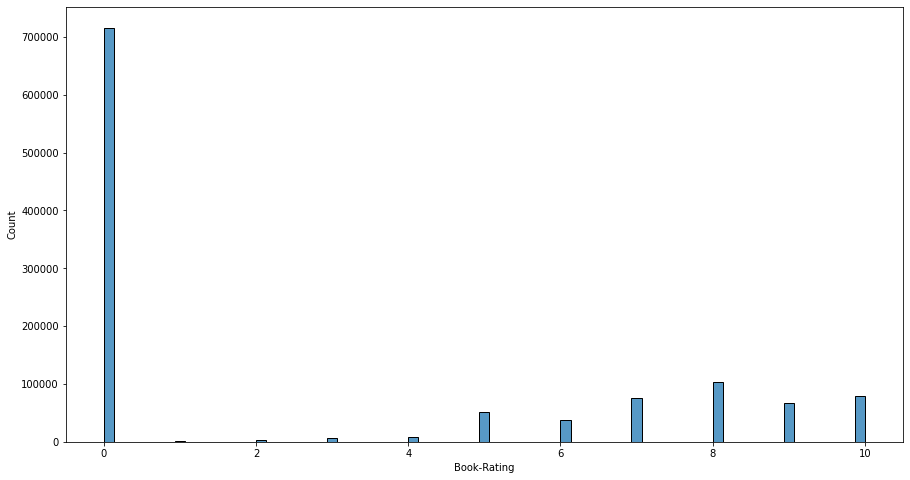

In [25]:
plt.figure(figsize=(15,8))
sns.histplot(data=ratings_df,x='Book-Rating')

In [26]:
ratings_df.drop_duplicates()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [27]:
users_df.drop_duplicates()

,User-ID,Location,Age,City,Country
0,1,"nyc, new york, usa",NaN,nyc,usa
1,2,"stockton, california, usa",18.0,stockton,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,united kingdom
...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,united kingdom
278855,278856,"brampton, ontario, canada",NaN,brampton,canada
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,usa


In [28]:
books_df.drop_duplicates()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [29]:
df1 = pd.merge(ratings_df, books_df, on="ISBN",how='inner')

In [30]:
df1.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating          1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031136 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031136 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
dtypes: int64(2), object(8)
memory usage: 86.5+ MB


In [32]:
df1.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
dtype: int64

In [33]:
df1.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [34]:
final_df=pd.merge(df1,users_df,on='User-ID',how='inner')

In [35]:
final_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,City,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",NaN,tyler,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0,cincinnati,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.0,cincinnati,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.0,cincinnati,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.0,cincinnati,usa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,http://images.amazon.com/images/P/2862749796.0...,"genève, genève, switzerland",62.0,genève,switzerland
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,http://images.amazon.com/images/P/3788097000.0...,"stuttgart, \n/a\""., germany""",NaN,stuttgart,"germany"""
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,http://images.amazon.com/images/P/0553571001.0...,"arlington heights, illinois, usa",13.0,arlington heights,usa
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,http://images.amazon.com/images/P/0689822294.0...,"arlington heights, illinois, usa",13.0,arlington heights,usa


In [36]:
final_df.drop(['Location','Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [37]:
final_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,NaN,tyler,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23.0,cincinnati,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,23.0,cincinnati,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,23.0,cincinnati,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,23.0,cincinnati,usa
...,...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,62.0,genève,switzerland
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,NaN,stuttgart,"germany"""
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,13.0,arlington heights,usa
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,13.0,arlington heights,usa


In [38]:
print('Total books: ', final_df['ISBN'].nunique())

Total books:  270151


In [39]:
print('Total users: ',final_df['User-ID'].nunique())

Total users:  92106


In [40]:
print('Number of outliers: ', sum(final_df['Age'] > 100) and sum(final_df['Age']<15))

Number of outliers:  10579


<Figure size 1080x576 with 0 Axes>

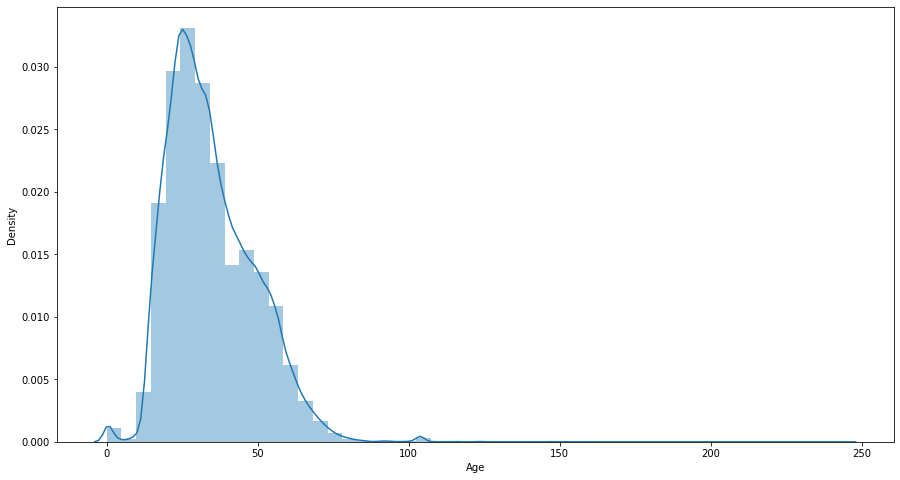

In [41]:
plt.figure(figsize=(15,8))
sns.distplot(users_df['Age'])

<Figure size 1080x576 with 0 Axes>

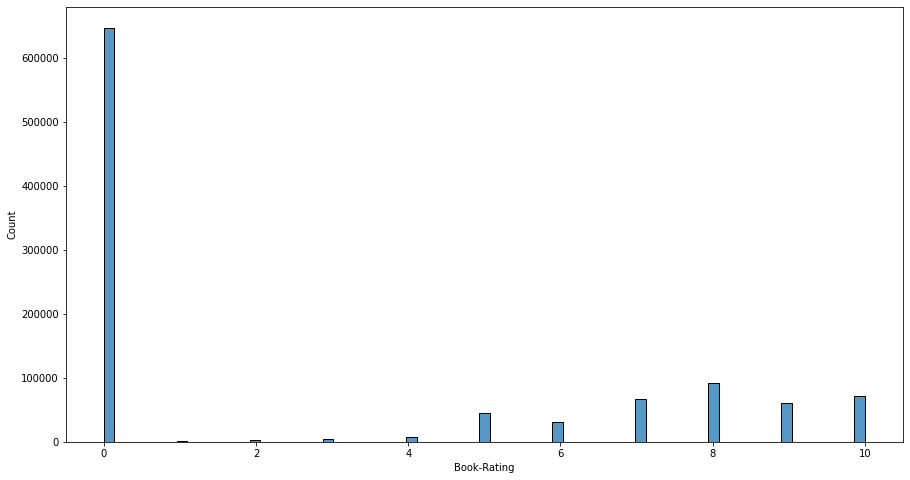

In [42]:
plt.figure(figsize=(15,8))
sns.histplot(data=final_df,x='Book-Rating')

In [43]:
final_df['Year-Of-Publication'].unique()

array(['2002', '1986', '1994', '1996', '1998', '2001', '1987', '1984',
       '1997', '1970', '1978', '1993', '1989', '1995', '1990', '1992',
       '1950', '1991', '1999', '1954', '1988', '2003', '2004', '2000',
       '1983', '1985', '1982', '1956', '1979', '1975', '0', '1976',
       '1981', '1977', '1980', '1974', '1957', '1958', '1960', '1963',
       '1969', '1972', '1961', '1971', '1953', '1968', '1973', '1967',
       '1962', '1937', '1959', '1955', '1946', '2005', '1945', '1965',
       '1964', '1927', '2020', '2050', '1920', '1966', '1952', '1930',
       '1940', '1942', '1947', '1925', '1948', '1923', '2030', '1951',
       '2021', '1941', '1932', '2011', '1901', '2038', '1929', '1943',
       '1936', 'DK Publishing Inc', '1928', '1939', '1944', '1938',
       '1902', '1900', '1911', '1949', '1906', '1806', '1933', '1935',
       '1926', '1922', '1897', '2026', '2006', '2037', '1924', '1921',
       '2024', 'Gallimard', '1378', '2008', '2010', '1934', '1909',
       '1931', 

In [44]:
final_df[final_df['Year-Of-Publication']=='DK Publishing Inc']

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Country
85425,130571,0789466953,0,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,NaN,summerville,usa
346284,227771,078946697X,7,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,19.0,savion,israel
594299,169663,078946697X,0,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,NaN,towson,usa


In [45]:
final_df[final_df['Year-Of-Publication']=='Gallimard']

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Country
402556,137190,2070426769,0,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,31.0,rennes,france


In [46]:
#books_df["Publisher"].loc[129037]="Bantam"

In [47]:
final_df['Year-Of-Publication']

0          2002
1          2002
2          1986
3          1994
4          1996
           ... 
1031131    2002
1031132    1984
1031133    2001
1031134    1998
1031135    1985
Name: Year-Of-Publication, Length: 1031136, dtype: object

In [48]:
final_df['Year-Of-Publication'].loc[85425]=0
final_df['Year-Of-Publication'].loc[346284]=0
final_df['Year-Of-Publication'].loc[594299]=0
final_df['Year-Of-Publication'].loc[402556]=0

In [49]:
final_df['Year-Of-Publication']=pd.to_numeric(final_df['Year-Of-Publication'])

<Figure size 1440x720 with 0 Axes>

[Text(0, 0, '0.0'),
 Text(0, 0, '20000.0'),
 Text(0, 0, '40000.0'),
 Text(0, 0, '60000.0'),
 Text(0, 0, '80000.0'),
 Text(0, 0, '100000.0'),
 Text(0, 0, '120000.0'),
 Text(0, 0, '140000.0'),
 Text(0, 0, '160000.0')]

[Text(0, 0, '1940.0'),
 Text(0, 0, '1950.0'),
 Text(0, 0, '1960.0'),
 Text(0, 0, '1970.0'),
 Text(0, 0, '1980.0'),
 Text(0, 0, '1990.0'),
 Text(0, 0, '2000.0'),
 Text(0, 0, '2010.0')]

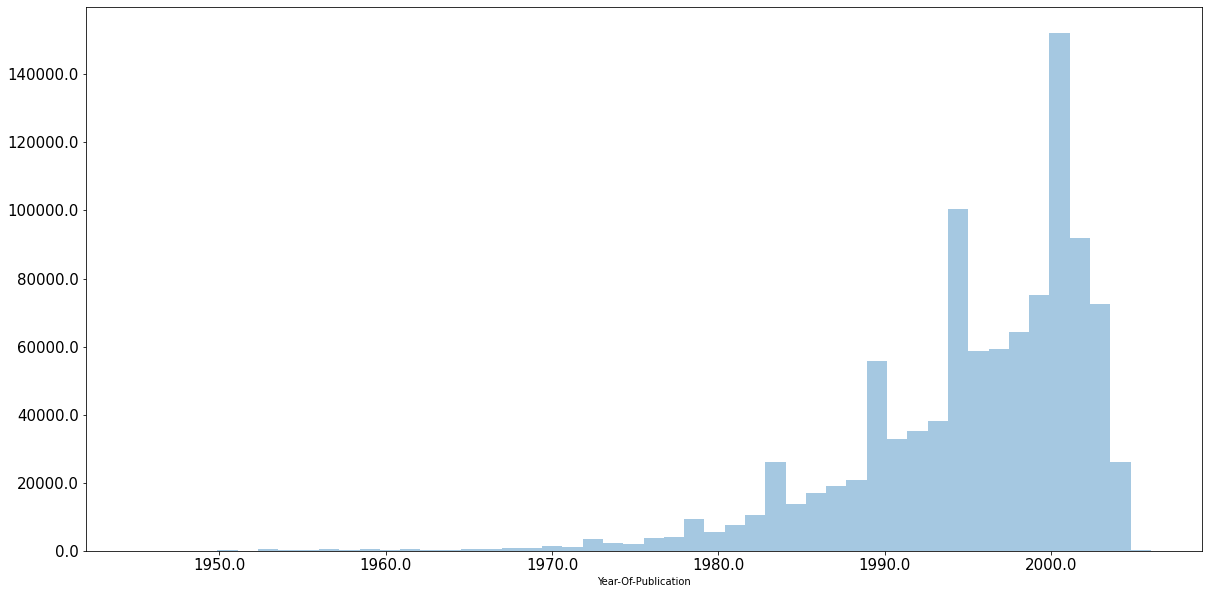

In [50]:
plt.figure(figsize=(20,10))
b=sns.distplot(final_df['Year-Of-Publication'],kde=False,hist_kws={"range": [1945,2006]})
b.set_yticklabels(b.get_yticks(), size = 15)
b.set_xticklabels(b.get_xticks(), size = 15)
plt.show()

<Figure size 1440x720 with 0 Axes>

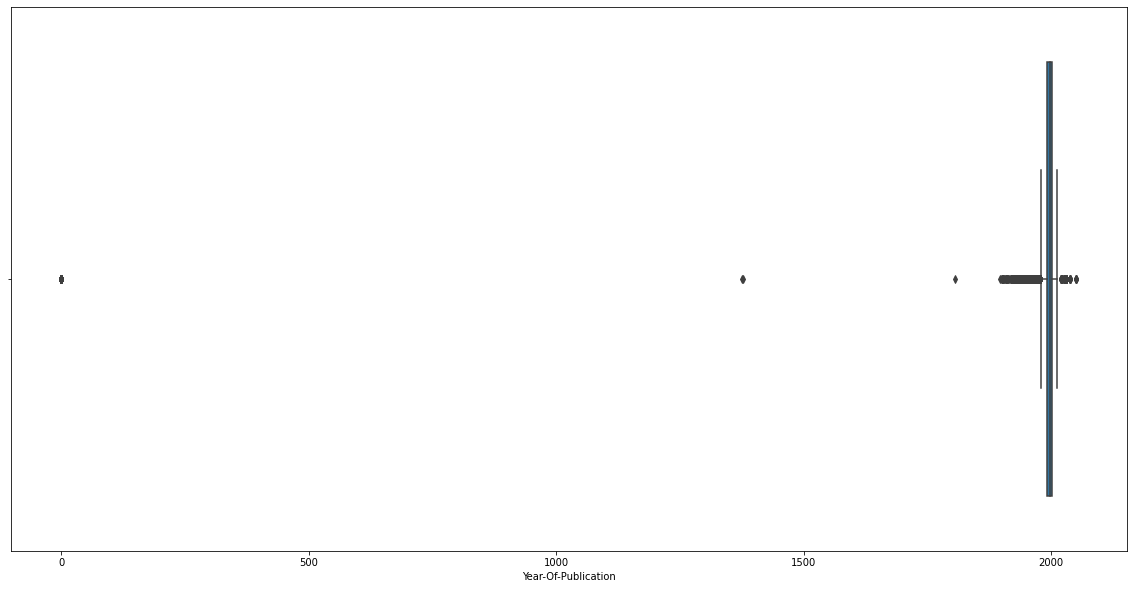

In [51]:
plt.figure(figsize=(20,10))
sns.boxplot(final_df['Year-Of-Publication'])

In [52]:
final_df=final_df[final_df['Year-Of-Publication']<=2006]

In [53]:
final_df=final_df[final_df['Year-Of-Publication']>=1980]

In [54]:
final_df.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,NaN,tyler,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23.0,cincinnati,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,23.0,cincinnati,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,23.0,cincinnati,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,23.0,cincinnati,usa


<Figure size 1440x720 with 0 Axes>

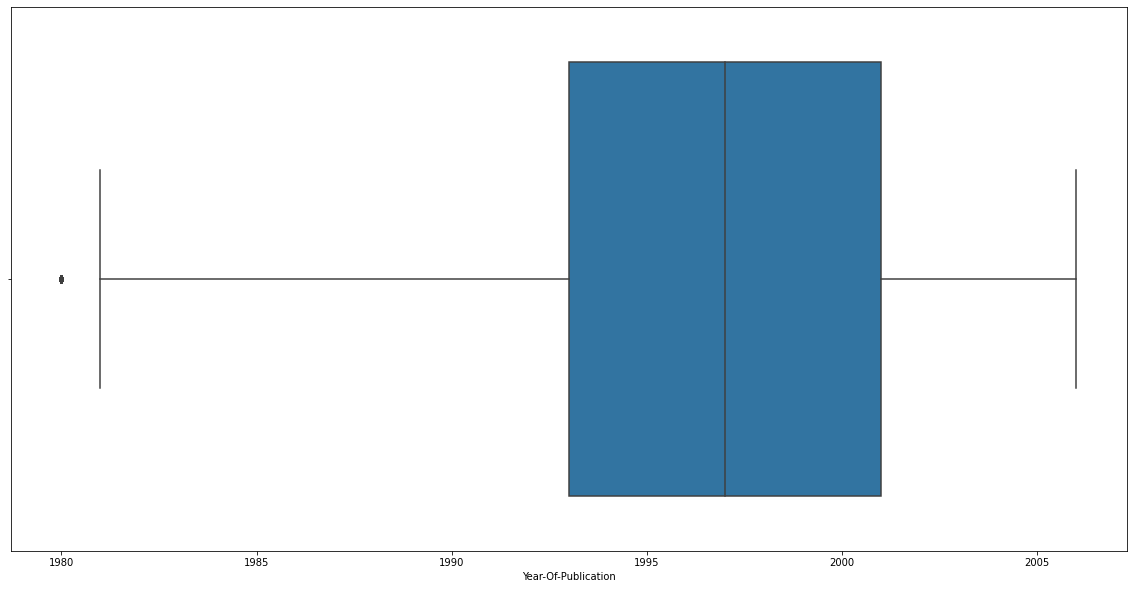

In [55]:
plt.figure(figsize=(20,10))
sns.boxplot(final_df['Year-Of-Publication'])

In [56]:
final_df['Age'].median()

35.0

In [57]:
final_df['Age']=np.where(final_df['Age']>=100,35,final_df['Age'])
final_df['Age']=np.where(final_df['Age']<=5,35,final_df['Age'])

In [58]:
final_df['Age'].unique()

array([nan, 23., 34., 35., 45., 24., 36., 51., 39., 52., 72., 30., 46.,
       41., 33., 29., 21., 38., 63., 26., 59., 44., 25., 54., 27., 28.,
       16., 20., 17., 56., 32., 61., 53., 31., 40., 37., 43., 50., 15.,
       19., 49., 47., 60., 69., 42., 22., 18., 64., 58., 68., 48., 14.,
       62., 71., 57.,  9., 67., 55., 66., 13., 75., 70., 65., 83., 11.,
       10., 12.,  8., 76., 73., 92., 80., 79., 90.,  7., 74., 77., 85.,
       82., 81., 84., 78., 97., 99., 98., 93., 86., 96., 89.,  6., 95.])

In [59]:
final_df['Age']=final_df['Age'].fillna(35)

<Figure size 1440x720 with 0 Axes>

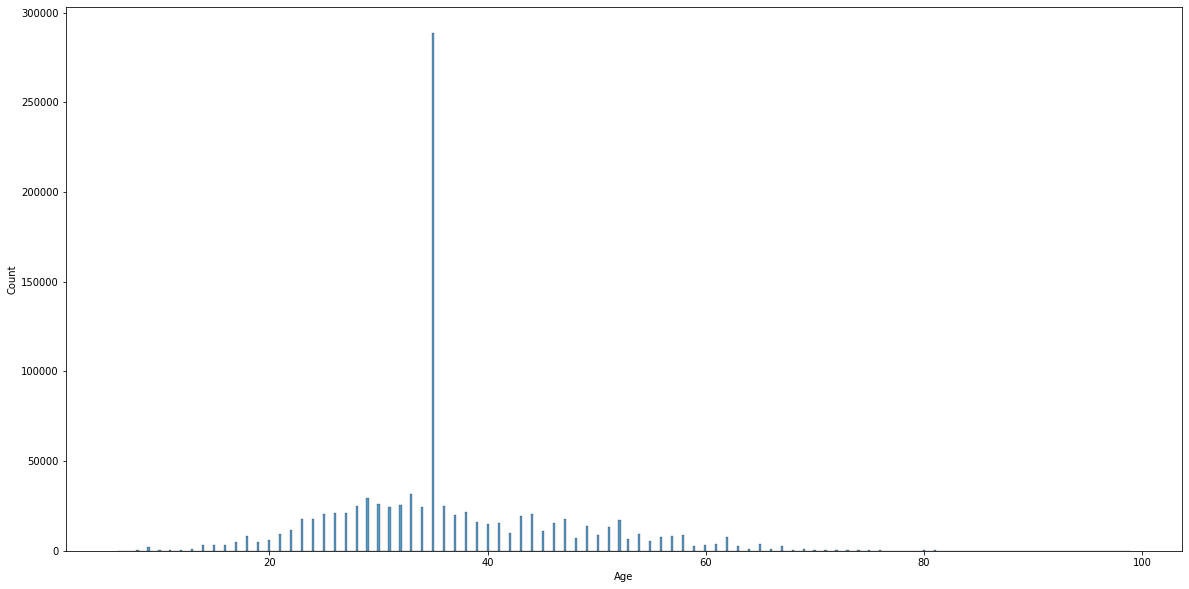

In [60]:
plt.figure(figsize=(20,10))
sns.histplot(final_df['Age'])

<Figure size 1440x720 with 0 Axes>

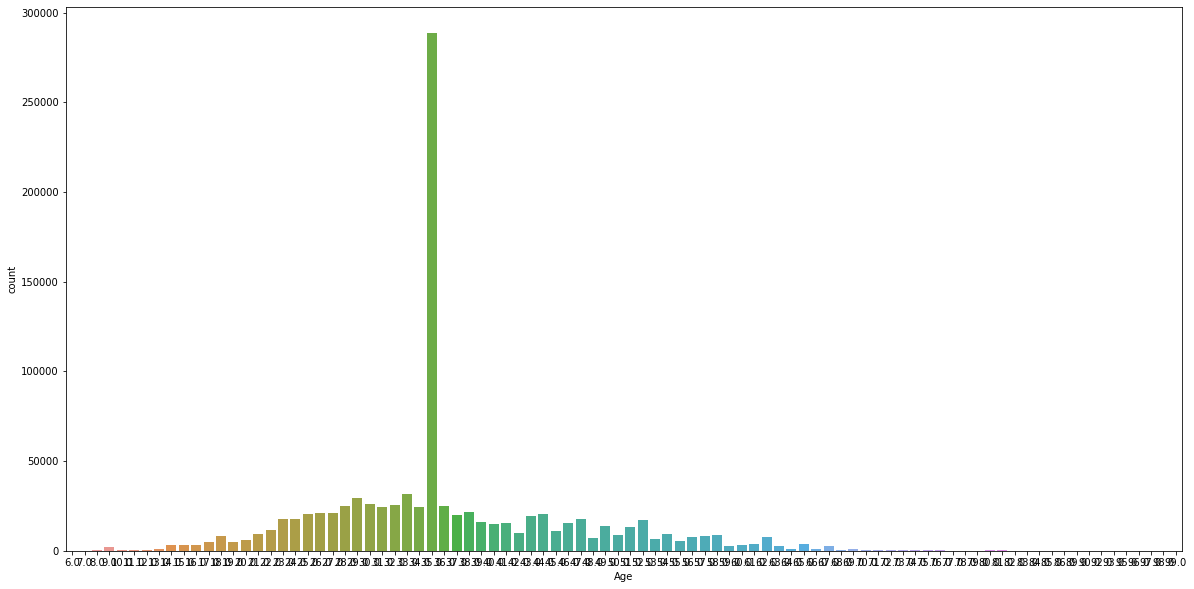

In [61]:
plt.figure(figsize=(20,10))
sns.countplot(final_df['Age'])

In [62]:
final_df.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Age                    0
City                   0
Country                0
dtype: int64

In [63]:
final_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,35.0,tyler,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23.0,cincinnati,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,23.0,cincinnati,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,23.0,cincinnati,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,23.0,cincinnati,usa
...,...,...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,62.0,genève,switzerland
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,35.0,stuttgart,"germany"""
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,13.0,arlington heights,usa
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,13.0,arlington heights,usa


In [64]:
explicit_df=final_df[final_df['Book-Rating']!=0]

In [65]:
explicit_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Country
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,23.0,cincinnati,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,23.0,cincinnati,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,23.0,cincinnati,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,23.0,cincinnati,usa
5,2313,0385482388,5,The Mistress of Spices,Chitra Banerjee Divakaruni,1998,Anchor Books/Doubleday,23.0,cincinnati,usa
...,...,...,...,...,...,...,...,...,...,...
1031130,276442,2264032960,6,L'Apprenti du diable,Ellis Peters,2001,Editions 10/18,62.0,genève,switzerland
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,62.0,genève,switzerland
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,35.0,stuttgart,"germany"""
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,13.0,arlington heights,usa


In [66]:
# del(final_df)
del(books_df)
del(ratings_df)
del(users_df)
del(df1)

In [67]:
final_ratings_matrix = explicit_df[:150000].pivot(index = 'User-ID', columns ='ISBN', values = 'Book-Rating').fillna(0)
final_ratings_matrix

ISBN,0001047973,000104799X,0001048082,0001053736,0001053744,0001056107,0001374362,0001714600,0001845039,0001944711,0001945203,0001953877,0001981307,0001981625,0002000547,0002005018,0002116286,0002153572,0002154900,0002165368,0002176181,0002176432,0002179695,0002181924,0002184974,0002189569,0002191792,0002192152,0002197154,0002198274,0002228394,000223257X,0002240114,0002243792,0002245728,000225056X,0002250810,0002250985,0002251485,0002251760,...,9838120014,9838120200,9838120634,9838523283,9839950789,9839995006,9871106173,9871138032,9871138148,9879397274,9879423224,987960170X,996898390X,9972847012,9974643058,9976100248,9976100256,999058284X,9990591199,9993584185,9994256963,B00001U0CP,B00005U7YK,B00007MF56,B00008RWPV,B00009EF82,B00009MBYK,B00009NDAN,B0000AA9JB,B0000AZW79,B0000C2W5U,B0000C7BNG,B0000E63CJ,B0000T6KHI,B0000T6KIM,B0000VZEJQ,B00011SOXI,B0001GMSV2,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#define user index from 0 to 10
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0], 1)
final_ratings_matrix.head()

ISBN,0001047973,000104799X,0001048082,0001053736,0001053744,0001056107,0001374362,0001714600,0001845039,0001944711,0001945203,0001953877,0001981307,0001981625,0002000547,0002005018,0002116286,0002153572,0002154900,0002165368,0002176181,0002176432,0002179695,0002181924,0002184974,0002189569,0002191792,0002192152,0002197154,0002198274,0002228394,000223257X,0002240114,0002243792,0002245728,000225056X,0002250810,0002250985,0002251485,0002251760,...,9838120200,9838120634,9838523283,9839950789,9839995006,9871106173,9871138032,9871138148,9879397274,9879423224,987960170X,996898390X,9972847012,9974643058,9976100248,9976100256,999058284X,9990591199,9993584185,9994256963,B00001U0CP,B00005U7YK,B00007MF56,B00008RWPV,B00009EF82,B00009MBYK,B00009NDAN,B0000AA9JB,B0000AZW79,B0000C2W5U,B0000C7BNG,B0000E63CJ,B0000T6KHI,B0000T6KIM,B0000VZEJQ,B00011SOXI,B0001GMSV2,B0001I1KOG,B000234N3A,user_index
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [69]:
final_ratings_matrix.set_index(['user_index'], inplace=True)
# Actual ratings given by users
final_ratings_matrix.head()

ISBN,0001047973,000104799X,0001048082,0001053736,0001053744,0001056107,0001374362,0001714600,0001845039,0001944711,0001945203,0001953877,0001981307,0001981625,0002000547,0002005018,0002116286,0002153572,0002154900,0002165368,0002176181,0002176432,0002179695,0002181924,0002184974,0002189569,0002191792,0002192152,0002197154,0002198274,0002228394,000223257X,0002240114,0002243792,0002245728,000225056X,0002250810,0002250985,0002251485,0002251760,...,9838120014,9838120200,9838120634,9838523283,9839950789,9839995006,9871106173,9871138032,9871138148,9879397274,9879423224,987960170X,996898390X,9972847012,9974643058,9976100248,9976100256,999058284X,9990591199,9993584185,9994256963,B00001U0CP,B00005U7YK,B00007MF56,B00008RWPV,B00009EF82,B00009MBYK,B00009NDAN,B0000AA9JB,B0000AZW79,B0000C2W5U,B0000C7BNG,B0000E63CJ,B0000T6KHI,B0000T6KIM,B0000VZEJQ,B00011SOXI,B0001GMSV2,B0001I1KOG,B000234N3A
user_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# Singular Value Decomposition
U, sigma, Vt = svds(final_ratings_matrix, k = 10)

In [71]:
print('Left singular matrix: \n',U)

Left singular matrix: 
 [[-2.56752492e-04  2.35456628e-04 -1.55778098e-04 ...  1.91767732e-05
  -8.81033940e-05  2.03776202e-04]
 [-2.81919309e-05  2.86922654e-05 -2.57982660e-05 ...  1.20944937e-05
  -3.51200359e-06  9.26144434e-07]
 [-2.13562876e-03  1.21938898e-03  1.26265736e-03 ...  7.50710566e-04
  -1.51713282e-03  3.79441716e-04]
 ...
 [-1.11622294e-04 -3.19261942e-03  6.47528991e-03 ...  2.03180669e-03
  -2.26042471e-03  9.37646660e-04]
 [-1.11948367e-06  5.67523444e-07 -5.11544114e-06 ... -4.51836033e-08
  -4.63831096e-07  9.16657301e-08]
 [-3.28851628e-03  1.83050880e-03 -8.82901967e-04 ...  1.67120502e-03
  -1.44695583e-03  3.83070056e-04]]


In [72]:
print('Sigma: \n',sigma)

Sigma: 
 [212.75428868 215.11883947 221.68022111 228.67588438 253.02838566
 265.46228568 279.94214232 373.82828048 619.77237931 679.02521965]


In [73]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[212.75428868   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.         215.11883947   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.         221.68022111   0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.         228.67588438   0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.         253.02838566
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
  265.46228568   0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.         279.94214232   0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.      

In [74]:
print('Right singular matrix: \n',Vt)

Right singular matrix: 
 [[-1.00005557e-04 -1.93904972e-04  1.00951230e-03 ... -2.60007092e-05
  -9.83628947e-05 -2.44379053e-03]
 [ 1.09657761e-04 -6.29001959e-06  5.67741142e-04 ...  5.30318928e-05
   6.48755478e-05  2.55143218e-03]
 [-1.60592965e-04 -7.56095075e-05  1.20291259e-04 ... -1.43704126e-04
   3.28558038e-05 -3.28911001e-03]
 ...
 [ 5.86520800e-06  7.39155434e-05  8.52389211e-05 ...  3.61784677e-05
   1.08100368e-06  2.10338344e-04]
 [-1.42223194e-05 -5.72608586e-05 -5.34034931e-05 ... -2.95770059e-05
  -3.28718857e-05 -1.43200032e-04]
 [ 3.11718906e-06  2.01610862e-05  2.05478268e-05 ...  1.21166448e-05
   7.14772647e-06  3.71039847e-05]]


In [75]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = final_ratings_matrix.columns)
preds_df.head()

ISBN,0001047973,000104799X,0001048082,0001053736,0001053744,0001056107,0001374362,0001714600,0001845039,0001944711,0001945203,0001953877,0001981307,0001981625,0002000547,0002005018,0002116286,0002153572,0002154900,0002165368,0002176181,0002176432,0002179695,0002181924,0002184974,0002189569,0002191792,0002192152,0002197154,0002198274,0002228394,000223257X,0002240114,0002243792,0002245728,000225056X,0002250810,0002250985,0002251485,0002251760,...,9838120014,9838120200,9838120634,9838523283,9839950789,9839995006,9871106173,9871138032,9871138148,9879397274,9879423224,987960170X,996898390X,9972847012,9974643058,9976100248,9976100256,999058284X,9990591199,9993584185,9994256963,B00001U0CP,B00005U7YK,B00007MF56,B00008RWPV,B00009EF82,B00009MBYK,B00009NDAN,B0000AA9JB,B0000AZW79,B0000C2W5U,B0000C7BNG,B0000E63CJ,B0000T6KHI,B0000T6KIM,B0000VZEJQ,B00011SOXI,B0001GMSV2,B0001I1KOG,B000234N3A
0,0.000044,0.000194,0.000155,-0.000121,-0.000121,0.001950,0.000019,0.000036,-0.000323,0.000240,0.000043,-3.189675e-06,6.467430e-06,0.000050,0.000162,0.000457,0.000121,0.000009,0.000014,0.000070,-2.870707e-06,0.000200,0.000243,-0.000121,0.000414,1.469670e-07,0.000061,0.000061,0.000013,4.375528e-06,0.000019,0.000071,0.000097,0.000114,0.000142,0.001818,0.000280,0.000011,0.000320,0.000909,...,0.000392,0.000024,0.000018,0.000176,0.000119,0.000013,0.000108,0.000062,0.000415,0.000280,2.999615e-06,0.000200,0.000068,2.310013e-08,0.000280,0.000061,0.000061,0.000086,5.926186e-06,0.000616,0.000373,0.000428,0.000129,0.000097,0.000213,0.000244,0.000040,0.000317,0.000034,0.000046,0.000128,0.000015,0.000023,0.000491,0.000028,0.000119,0.000122,0.000097,0.000047,0.000747
1,0.000006,0.000028,0.000024,0.000007,0.000007,0.000279,0.000003,0.000005,0.000015,-0.000071,0.000006,9.821633e-07,9.222971e-07,0.000007,0.000023,-0.000075,0.000018,0.000001,0.000002,0.000011,8.839470e-07,-0.000059,0.000036,0.000007,-0.000063,1.644691e-08,0.000009,0.000009,0.000002,6.871380e-07,0.000003,0.000010,0.000014,0.000016,0.000021,0.000253,-0.000083,0.000002,-0.000095,0.000132,...,0.000056,0.000003,0.000003,0.000026,0.000018,0.000002,0.000015,0.000009,0.000060,-0.000083,4.273217e-07,-0.000059,0.000010,3.092691e-09,-0.000083,0.000009,0.000009,0.000012,8.406349e-07,0.000089,0.000055,0.000062,0.000018,0.000014,0.000031,0.000035,0.000006,0.000045,0.000005,0.000007,0.000019,0.000002,0.000003,0.000071,0.000004,0.000017,0.000018,0.000014,0.000006,0.000106
2,0.000422,0.002766,0.002434,-0.001873,-0.001873,0.024462,0.000216,0.000515,-0.002988,0.000605,0.000588,-1.532808e-04,8.244252e-05,0.000702,0.002204,0.002767,0.001653,0.000090,0.000108,0.001096,-1.379527e-04,0.000504,0.002982,-0.001873,0.002476,1.718876e-06,0.000731,0.000731,0.000094,5.276147e-05,0.000221,0.000880,0.001458,0.001689,0.001928,0.009217,0.000706,0.000199,0.000807,0.011364,...,0.004620,0.000260,0.000195,0.002647,0.001649,0.000200,0.001352,0.000657,0.004995,0.000706,3.294521e-05,0.000504,0.000783,1.494714e-07,0.000706,0.000731,0.000731,0.001158,7.104513e-05,0.006956,0.003613,0.005659,0.001402,0.001663,0.003619,0.003309,0.000603,0.003576,0.000318,0.000725,0.001807,0.000210,0.000287,0.007765,0.000305,0.001586,0.001677,0.001292,0.000637,0.006168
3,0.002377,0.007451,0.005782,0.007928,0.007928,0.088594,0.000929,0.001433,-0.010568,-0.004937,0.001681,1.127483e-04,3.053469e-04,0.001975,0.006511,-0.001402,0.004883,0.000478,0.000839,0.002489,1.014735e-04,-0.004114,0.011487,0.007928,0.000002,6.085092e-06,0.002980,0.002980,0.000734,2.521478e-04,0.000900,0.003096,0.003404,0.004281,0.005697,0.124525,-0.005760,0.000226,-0.006583,0.039845,...,0.018634,0.001120,0.000840,0.006465,0.004610,0.000403,0.004860,0.003086,0.019332,-0.005760,1.500067e-04,-0.004114,0.003321,1.505865e-06,-0.005760,0.002980,0.002980,0.003585,2.813525e-04,0.030381,0.020063,0.017095,0.006426,0.002680,0.006233,0.010054,0.001524,0.015565,0.001929,0.001630,0.005072,0.000626,0.001034,0.017291,0.001463,0.004993,0.005009,0.004005,0.001931,0.043658
4,0.000106,0.000507,0.000520,0.000112,0.000112,0.

In [76]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = final_ratings_matrix.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [77]:
userID = 4
num_recommendations = 5
recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 4):

                   user_ratings  user_predictions
Recommended Items                                
043935806X                  0.0          1.962877
0316666343                  0.0          1.556490
059035342X                  0.0          1.313366
0312195516                  0.0          0.777889
0385504209                  0.0          0.770631


In [78]:
# Actual ratings given by the users
final_ratings_matrix.head()

ISBN,0001047973,000104799X,0001048082,0001053736,0001053744,0001056107,0001374362,0001714600,0001845039,0001944711,0001945203,0001953877,0001981307,0001981625,0002000547,0002005018,0002116286,0002153572,0002154900,0002165368,0002176181,0002176432,0002179695,0002181924,0002184974,0002189569,0002191792,0002192152,0002197154,0002198274,0002228394,000223257X,0002240114,0002243792,0002245728,000225056X,0002250810,0002250985,0002251485,0002251760,...,9838120014,9838120200,9838120634,9838523283,9839950789,9839995006,9871106173,9871138032,9871138148,9879397274,9879423224,987960170X,996898390X,9972847012,9974643058,9976100248,9976100256,999058284X,9990591199,9993584185,9994256963,B00001U0CP,B00005U7YK,B00007MF56,B00008RWPV,B00009EF82,B00009MBYK,B00009NDAN,B0000AA9JB,B0000AZW79,B0000C2W5U,B0000C7BNG,B0000E63CJ,B0000T6KHI,B0000T6KIM,B0000VZEJQ,B00011SOXI,B0001GMSV2,B0001I1KOG,B000234N3A
user_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

ISBN
0001047973    0.002157
000104799X    0.003595
0001048082    0.001918
0001053736    0.001198
0001053744    0.001198
dtype: float64

In [80]:
# Predicted ratings 
preds_df.head()

ISBN,0001047973,000104799X,0001048082,0001053736,0001053744,0001056107,0001374362,0001714600,0001845039,0001944711,0001945203,0001953877,0001981307,0001981625,0002000547,0002005018,0002116286,0002153572,0002154900,0002165368,0002176181,0002176432,0002179695,0002181924,0002184974,0002189569,0002191792,0002192152,0002197154,0002198274,0002228394,000223257X,0002240114,0002243792,0002245728,000225056X,0002250810,0002250985,0002251485,0002251760,...,9838120014,9838120200,9838120634,9838523283,9839950789,9839995006,9871106173,9871138032,9871138148,9879397274,9879423224,987960170X,996898390X,9972847012,9974643058,9976100248,9976100256,999058284X,9990591199,9993584185,9994256963,B00001U0CP,B00005U7YK,B00007MF56,B00008RWPV,B00009EF82,B00009MBYK,B00009NDAN,B0000AA9JB,B0000AZW79,B0000C2W5U,B0000C7BNG,B0000E63CJ,B0000T6KHI,B0000T6KIM,B0000VZEJQ,B00011SOXI,B0001GMSV2,B0001I1KOG,B000234N3A
0,0.000044,0.000194,0.000155,-0.000121,-0.000121,0.001950,0.000019,0.000036,-0.000323,0.000240,0.000043,-3.189675e-06,6.467430e-06,0.000050,0.000162,0.000457,0.000121,0.000009,0.000014,0.000070,-2.870707e-06,0.000200,0.000243,-0.000121,0.000414,1.469670e-07,0.000061,0.000061,0.000013,4.375528e-06,0.000019,0.000071,0.000097,0.000114,0.000142,0.001818,0.000280,0.000011,0.000320,0.000909,...,0.000392,0.000024,0.000018,0.000176,0.000119,0.000013,0.000108,0.000062,0.000415,0.000280,2.999615e-06,0.000200,0.000068,2.310013e-08,0.000280,0.000061,0.000061,0.000086,5.926186e-06,0.000616,0.000373,0.000428,0.000129,0.000097,0.000213,0.000244,0.000040,0.000317,0.000034,0.000046,0.000128,0.000015,0.000023,0.000491,0.000028,0.000119,0.000122,0.000097,0.000047,0.000747
1,0.000006,0.000028,0.000024,0.000007,0.000007,0.000279,0.000003,0.000005,0.000015,-0.000071,0.000006,9.821633e-07,9.222971e-07,0.000007,0.000023,-0.000075,0.000018,0.000001,0.000002,0.000011,8.839470e-07,-0.000059,0.000036,0.000007,-0.000063,1.644691e-08,0.000009,0.000009,0.000002,6.871380e-07,0.000003,0.000010,0.000014,0.000016,0.000021,0.000253,-0.000083,0.000002,-0.000095,0.000132,...,0.000056,0.000003,0.000003,0.000026,0.000018,0.000002,0.000015,0.000009,0.000060,-0.000083,4.273217e-07,-0.000059,0.000010,3.092691e-09,-0.000083,0.000009,0.000009,0.000012,8.406349e-07,0.000089,0.000055,0.000062,0.000018,0.000014,0.000031,0.000035,0.000006,0.000045,0.000005,0.000007,0.000019,0.000002,0.000003,0.000071,0.000004,0.000017,0.000018,0.000014,0.000006,0.000106
2,0.000422,0.002766,0.002434,-0.001873,-0.001873,0.024462,0.000216,0.000515,-0.002988,0.000605,0.000588,-1.532808e-04,8.244252e-05,0.000702,0.002204,0.002767,0.001653,0.000090,0.000108,0.001096,-1.379527e-04,0.000504,0.002982,-0.001873,0.002476,1.718876e-06,0.000731,0.000731,0.000094,5.276147e-05,0.000221,0.000880,0.001458,0.001689,0.001928,0.009217,0.000706,0.000199,0.000807,0.011364,...,0.004620,0.000260,0.000195,0.002647,0.001649,0.000200,0.001352,0.000657,0.004995,0.000706,3.294521e-05,0.000504,0.000783,1.494714e-07,0.000706,0.000731,0.000731,0.001158,7.104513e-05,0.006956,0.003613,0.005659,0.001402,0.001663,0.003619,0.003309,0.000603,0.003576,0.000318,0.000725,0.001807,0.000210,0.000287,0.007765,0.000305,0.001586,0.001677,0.001292,0.000637,0.006168
3,0.002377,0.007451,0.005782,0.007928,0.007928,0.088594,0.000929,0.001433,-0.010568,-0.004937,0.001681,1.127483e-04,3.053469e-04,0.001975,0.006511,-0.001402,0.004883,0.000478,0.000839,0.002489,1.014735e-04,-0.004114,0.011487,0.007928,0.000002,6.085092e-06,0.002980,0.002980,0.000734,2.521478e-04,0.000900,0.003096,0.003404,0.004281,0.005697,0.124525,-0.005760,0.000226,-0.006583,0.039845,...,0.018634,0.001120,0.000840,0.006465,0.004610,0.000403,0.004860,0.003086,0.019332,-0.005760,1.500067e-04,-0.004114,0.003321,1.505865e-06,-0.005760,0.002980,0.002980,0.003585,2.813525e-04,0.030381,0.020063,0.017095,0.006426,0.002680,0.006233,0.010054,0.001524,0.015565,0.001929,0.001630,0.005072,0.000626,0.001034,0.017291,0.001463,0.004993,0.005009,0.004005,0.001931,0.043658
4,0.000106,0.000507,0.000520,0.000112,0.000112,0.

In [81]:
# Average PREDICTED rating for each item
preds_df.mean().head()

ISBN
0001047973    0.000372
000104799X    0.001893
0001048082    0.001790
0001053736    0.002120
0001053744    0.002120
dtype: float64

In [82]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(76040, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
ISBN,,,
0001047973,0.002157,0.000372,0
000104799X,0.003595,0.001893,1
0001048082,0.001918,0.001790,2
0001053736,0.001198,0.002120,3
0001053744,0.001198,0.002120,4


In [83]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('RMSE SVD Model = {} \n'.format(RMSE))

RMSE SVD Model = 0.00355 



In [84]:
final_ratings_matrix

ISBN,0001047973,000104799X,0001048082,0001053736,0001053744,0001056107,0001374362,0001714600,0001845039,0001944711,0001945203,0001953877,0001981307,0001981625,0002000547,0002005018,0002116286,0002153572,0002154900,0002165368,0002176181,0002176432,0002179695,0002181924,0002184974,0002189569,0002191792,0002192152,0002197154,0002198274,0002228394,000223257X,0002240114,0002243792,0002245728,000225056X,0002250810,0002250985,0002251485,0002251760,...,9838120014,9838120200,9838120634,9838523283,9839950789,9839995006,9871106173,9871138032,9871138148,9879397274,9879423224,987960170X,996898390X,9972847012,9974643058,9976100248,9976100256,999058284X,9990591199,9993584185,9994256963,B00001U0CP,B00005U7YK,B00007MF56,B00008RWPV,B00009EF82,B00009MBYK,B00009NDAN,B0000AA9JB,B0000AZW79,B0000C2W5U,B0000C7BNG,B0000E63CJ,B0000T6KHI,B0000T6KIM,B0000VZEJQ,B00011SOXI,B0001GMSV2,B0001I1KOG,B000234N3A
user_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
df1=final_df.loc[(final_df['Age']<=15)]

In [86]:
df1

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Country
50945,201349,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,15.0,thomson,usa
50946,201349,0385484518,0,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,15.0,thomson,usa
50947,201349,0061013145,0,Tears of the Moon,Di Morrissey,1998,HarperCollins Publishers,15.0,thomson,usa
50948,201349,0316603287,10,The Lake House,James Patterson,2003,"Little, Brown",15.0,thomson,usa
50949,201349,0385493800,0,The Testament,John Grisham,1999,Doubleday Books,15.0,thomson,usa
...,...,...,...,...,...,...,...,...,...,...
1031036,272469,186208260X,5,Gemma James American Adventure (Magic Jeweller...,Mike Gower,1997,Dorling Kindersley,14.0,sydney,australia
1031053,273058,0681007702,5,Anne of Green Gables,L.M. Montgomery,1995,Longmeadow Press,15.0,millis,usa
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,13.0,arlington heights,usa
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,13.0,arlington heights,usa


In [87]:
df1=df1[df1['Country'].str.contains("usa")]

In [88]:
df1

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Country
50945,201349,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,15.0,thomson,usa
50946,201349,0385484518,0,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,15.0,thomson,usa
50947,201349,0061013145,0,Tears of the Moon,Di Morrissey,1998,HarperCollins Publishers,15.0,thomson,usa
50948,201349,0316603287,10,The Lake House,James Patterson,2003,"Little, Brown",15.0,thomson,usa
50949,201349,0385493800,0,The Testament,John Grisham,1999,Doubleday Books,15.0,thomson,usa
...,...,...,...,...,...,...,...,...,...,...
1030304,245526,0934323232,6,Cinderella (Talking Mother Goose Series),Margaret Hughes,1986,"Alchemy Communications Group, Limited",14.0,la mesa,usa
1030892,269279,0689812353,5,Galax-Arena,Gillian Rubinstein,1997,Aladdin Publishing Company,15.0,woodland,usa
1031053,273058,0681007702,5,Anne of Green Gables,L.M. Montgomery,1995,Longmeadow Press,15.0,millis,usa
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,13.0,arlington heights,usa


In [89]:
df1.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Age,City,Country
50945,201349,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,15.0,thomson,usa
50946,201349,0385484518,0,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997,Doubleday,15.0,thomson,usa
50947,201349,0061013145,0,Tears of the Moon,Di Morrissey,1998,HarperCollins Publishers,15.0,thomson,usa
50948,201349,0316603287,10,The Lake House,James Patterson,2003,"Little, Brown",15.0,thomson,usa
50949,201349,0385493800,0,The Testament,John Grisham,1999,Doubleday Books,15.0,thomson,usa
...,...,...,...,...,...,...,...,...,...,...
1030304,245526,0934323232,6,Cinderella (Talking Mother Goose Series),Margaret Hughes,1986,"Alchemy Communications Group, Limited",14.0,la mesa,usa
1030892,269279,0689812353,5,Galax-Arena,Gillian Rubinstein,1997,Aladdin Publishing Company,15.0,woodland,usa
1031053,273058,0681007702,5,Anne of Green Gables,L.M. Montgomery,1995,Longmeadow Press,15.0,millis,usa
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,13.0,arlington heights,usa


In [90]:
if not df1[df1.duplicated(['User-ID', 'Book-Title'])].empty:
    initial_rows = df1.shape[0]

    print('Initial dataframe shape {0}'.format(df1.shape))
    df1 = df1.drop_duplicates(['User-ID', 'Book-Title'])
    current_rows = df1.shape[0]
    print('New dataframe shape {0}'.format(df1.shape))
    print('Removed {0} rows'.format(initial_rows - current_rows))

Initial dataframe shape (8973, 10)
New dataframe shape (8934, 10)
Removed 39 rows


In [91]:
us_user_rating_pivot = df1.pivot(index = 'Book-Title',columns = 'User-ID', values = 'Book-Rating').fillna(0)
us_user_rating_matrix = csr_matrix(us_user_rating_pivot.values)

In [92]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [93]:
# query_index = np.random.choice(us_user_rating_pivot.shape[0])
# distances, indices = model_knn.kneighbors(us_user_rating_pivot.iloc[query_index, :].reshape(1, -1), n_neighbors = 6)

# for i in range(0, len(distances.flatten())):
#     if i == 0:
#         print('Recommendations for {0}:\n'.format(us_user_rating_pivot.index[query_index]))
#     else:
#         print('{0}: {1}, with distance of {2}:'.format(i, us_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))